In [1]:
import hypernetx as hnx
import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter('ignore')

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

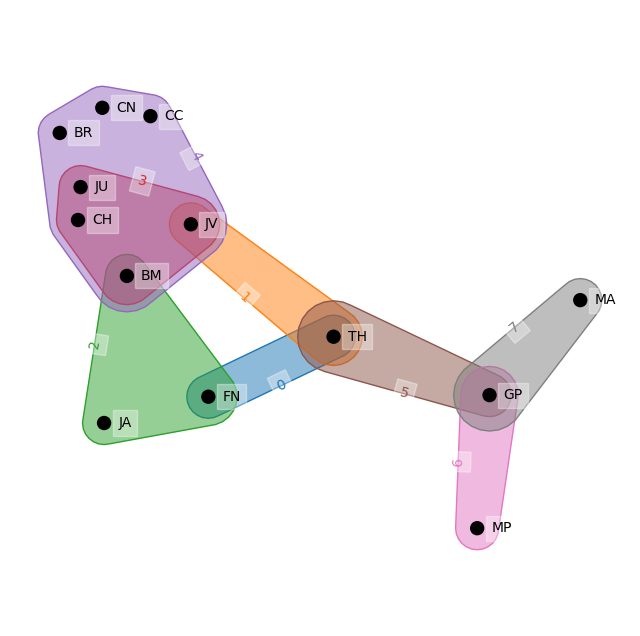

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)
hnx.draw(H)

# Collapsing hypergraphs

When we look at the above example, we might notice that some nodes, `CC, BR, and CN` for example, have the same edge memberships. From this standpoint, they are equivalent. We can reduce the complexity of the drawing by using `hypernetx.Hypergraph.collapse_nodes` to find all sets of these equivalent nodes and replace them with a single representative.

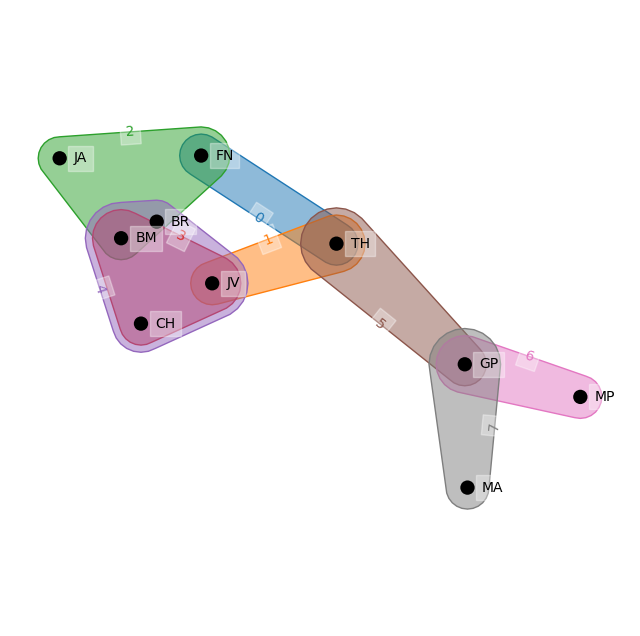

In [3]:
Hc = H.collapse_nodes()
hnx.draw(Hc)

## Working with Equivalence Classes
However, when we call `collapse_nodes` by default, we cannot easily determine where the omitted/redundant nodes belong or how many there were. To remedy this, we recommend passing `return_equivalence_classes=True` into `collapse_nodes`, which will return a dictionary mapping the representative node in the collpased hypergraph to a list of all the equivalent nodes in the original hypergraph.

In [4]:
Hc, eq = H.collapse_nodes(return_equivalence_classes=True)
eq

{'BM': ['BM'],
 'BR': ['BR', 'CC', 'CN'],
 'CH': ['CH', 'JU'],
 'FN': ['FN'],
 'GP': ['GP'],
 'JA': ['JA'],
 'JV': ['JV'],
 'MA': ['MA'],
 'MP': ['MP'],
 'TH': ['TH']}

## Sizing with Equivalence Info
We may want to set the node size to be proportional to the number of nodes in its equivalence class. This can be easiliy done using the equivalnce information and the `node_radius` kwarg. We can define a function `get_node_radius` that looks up the size of the equivalence class and converts this from area to radius.

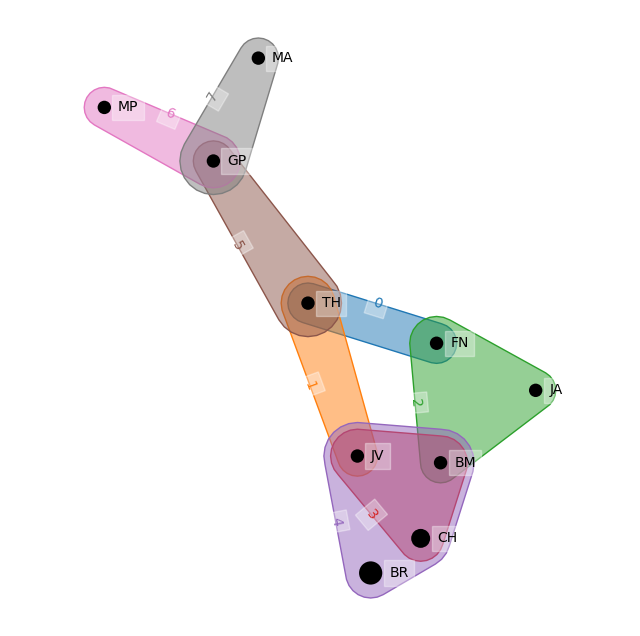

In [5]:
def get_node_radius(v):
    return len(eq[v])**.5

hnx.draw(Hc, node_radius=get_node_radius)

## Labeling with Equivalence Info
We can use this equivalence class dictionary to better label the collapsed hypergraph. We have added a convenience function called `create_labels` that handles many of the common use cases for labeling the nodes in a collapsed hypergraph. By default it shows the name of the representative node and the number of members in its equivalence class. If the equivalence class has cardinality 1, then the count is omitted.

In [6]:
from hypernetx.drawing.util import create_labels
create_labels(eq)

{'BM': 'BM',
 'BR': 'BR x3',
 'CH': 'CH x2',
 'FN': 'FN',
 'GP': 'GP',
 'JA': 'JA',
 'JV': 'JV',
 'MA': 'MA',
 'MP': 'MP',
 'TH': 'TH'}

# Labeling Options

For anything but trivially small hypergraphs, the number of items in a collapsed element can be large, causing the label to be very long. You can customize the display of node labels by generating a modified set of labels using the `create_labels` function to mitigated this. This function operates on an equivalence class extracted from collapsed nodes and provides several parameters to control the label format.

The examples below illustrate different useful combinations of the `create_labels` function.

1. **Default**: When passing only the equivalence class as input, collapsed nodes are automatically denoted with markings such as `x2` and `x3`. These markings indicate the number of nodes that have been merged into a single representation, where x2 signifies two collapsed nodes, x3 signifies three, and so on. This notation helps to visualize the level of node aggregation within the structure.
2. **As Sets**: The `as_set` argument allows you to represent labels using a set format, displaying the nodes that have been collapsed as a grouped collection. Enabling this option provides a clearer view of the combined nodes within the collapsed structure.
3. **Without Counts**: Setting `with_counts` to False removes any notation indicating the number of collapsed nodes. This results in the display of the original set of labels without additional aggregation details.
4. **Without Labels**: Setting `with_labels` to False removes the original labels and retains only the aggregated notation for nodes where more than one node has been collapsed. This simplifies the representation by focusing solely on the collapse count without displaying individual labels.
5. **With Singletons**: Setting `include_singletons` to True ensures that all labels display markings indicating the number of collapsed nodes, including singleton elements. This representation retains the original set of labels while adding collapse notations for both grouped and individual nodes.
6. **Only Counts**: When `with_labels` is set to False and `include_singletons` is set to True, all labels are displayed with markings indicating the number of collapsed nodes. This representation excludes the original set of labels, showing only the aggregated notation for both collapsed and singleton nodes.

This example also demonstrates how to use `pos=` and `return_pos=` to ensure the same layout is used for each drawing.

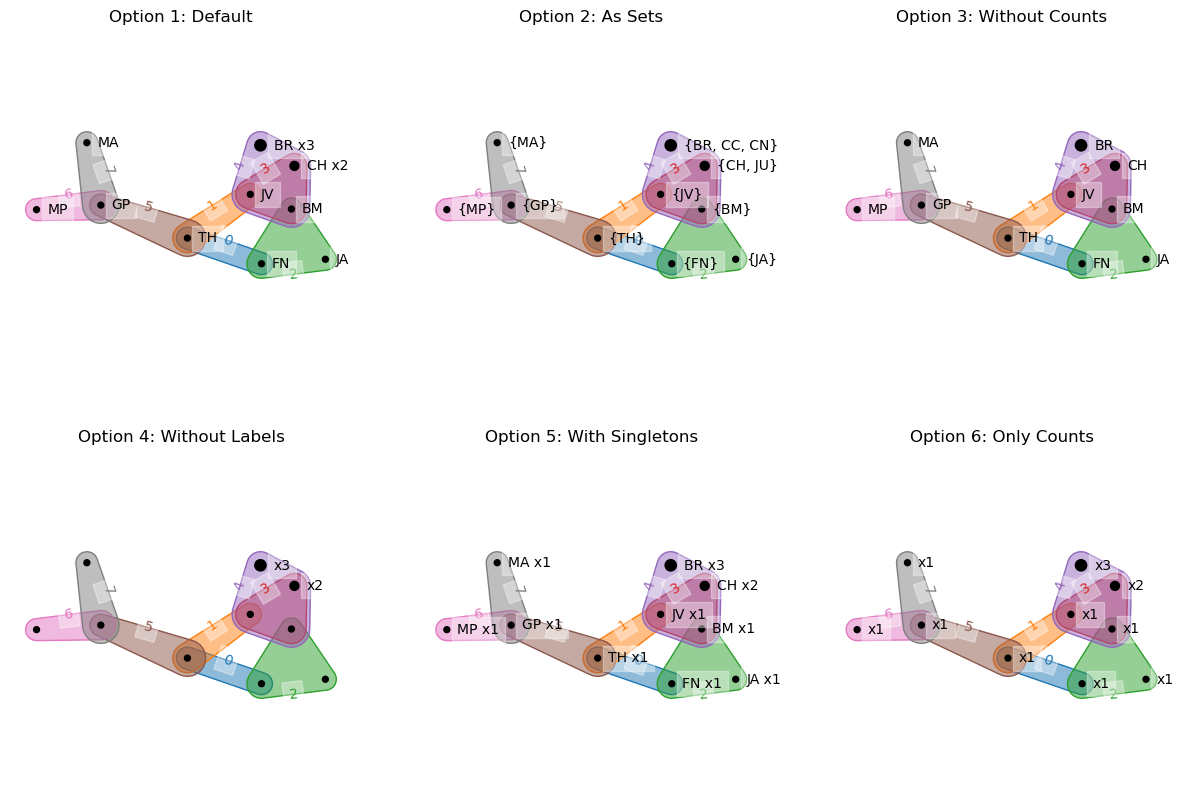

In [7]:
# all labeling options
kwargs_options = [
    ('Default', dict()),
    ('As Sets', dict(as_set=True)),
    ('Without Counts', dict(with_counts=False)),
    ('Without Labels', dict(with_labels=False)),
    ('With Singletons', dict(include_singletons=True)),
    ('Only Counts', dict(with_labels=False, include_singletons=True))
]

pos = None # initial position is unset (will be calculated by layout algorithm)

plt.figure(figsize=(15, 10))
for i, (t, kwargs) in enumerate(kwargs_options):
    # customize the node labels based on the kwargs option 
    labels = node_labels=create_labels(eq, **kwargs)

    plt.subplot(2, 3, i + 1)
    plt.title(f'Option {i + 1}: {t}')
    pos = hnx.draw(
        Hc,
        pos=pos, # set the node positions to the position of the previous drawing
        return_pos=True, # return the node positions so it can be used by subsequent drawings
        node_radius=get_node_radius, # reuse this function from a previous examples
        node_labels=labels # pass in the custoimzed labels
    )
